# SUPPORT VECTOR REGRESSION

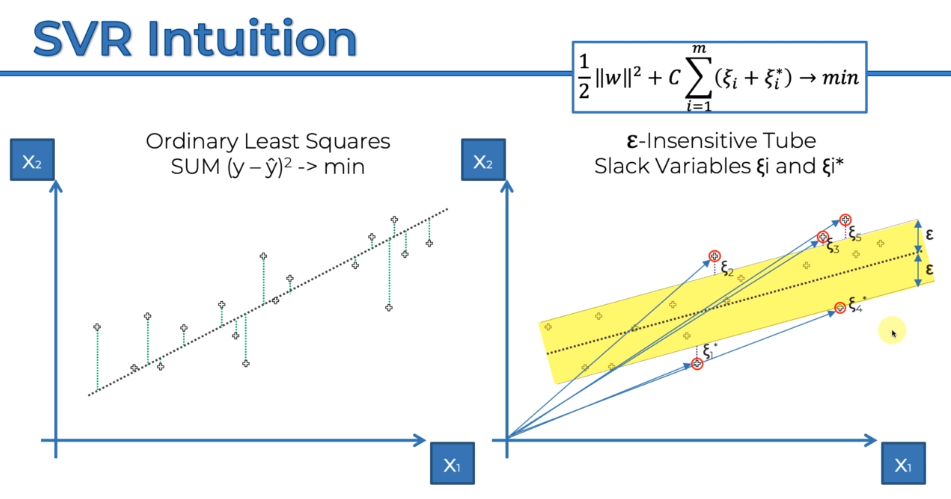

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing Dataset

pos_salaries = pd.read_csv('Position_Salaries.csv')
x = pos_salaries.iloc[:, 1:-1].values
y = pos_salaries.iloc[:, -1].values

In [4]:
pos_salaries

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
# Reshape y because Standard Scalar Class expects 2D Array

y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

# We will create a different object of StandardScaler Class for y
# because when we fit sc_x on x, it will compute mean of x but y has different mean
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [9]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training SVR Model on Whole Dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

C:\Users\nandn\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting a new result

In [12]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

## Visualizing SVR Results

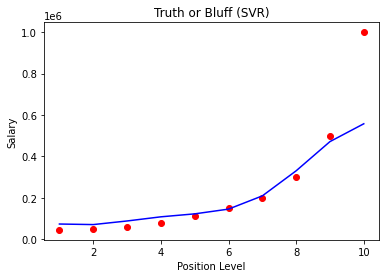

In [13]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-5.85952611e-01 -5.97680176e-01 -6.07914958e-01 -6.16616698e-01
 -6.23762314e-01 -6.29346126e-01 -6.33379773e-01 -6.35891823e-01
 -6.36927105e-01 -6.36545763e-01 -6.34822067e-01 -6.31843012e-01
 -6.27706734e-01 -6.22520772e-01 -6.16400224e-01 -6.09465812e-01
 -6.01841909e-01 -5.93654538e-01 -5.85029378e-01 -5.76089797e-01
 -5.66954930e-01 -5.57737810e-01 -5.48543571e-01 -5.39467715e-01
 -5.30594473e-01 -5.21995228e-01 -5.13727049e-01 -5.05831300e-01
 -4.98332360e-01 -4.91236462e-01 -4.84530660e-01 -4.78181955e-01
 -4.72136604e-01 -4.66319644e-01 -4.60634670e-01 -4.54963901e-01
 -4.49168588e-01 -4.43089786e-01 -4.36549542e-01 -4.29352538e-01
 -4.21288188e-01 -4.12133249e-01 -4.01654905e-01 -3.89614353e-01
 -3.75770841e-01 -3.59886133e-01 -3.41729327e-01 -3.21081968e-01
 -2.97743342e-01 -2.71535859e-01 -2.42310395e-01 -2.09951466e-01
 -1.74382089e-01 -1.35568196e-01 -9.35224619e-02 -4.83074018e-02
 -3.76364348e-05  5.11187990e-02  1.04940177e-01  1.61151900e-01
  2.19428447e-01  2.79396465e-01  3.40638969e-01  4.02700595e-01
  4.65093825e-01  5.27306063e-01  5.88807423e-01  6.49059063e-01
  7.07521880e-01  7.63665380e-01  8.16976506e-01  8.66968233e-01
  9.13187725e-01  9.55223864e-01  9.92713982e-01  1.02534964e+00
  1.05288136e+00  1.07512211e+00  1.09194964e+00  1.10330753e+00
  1.10920488e+00  1.10971491e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

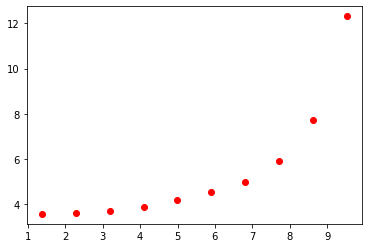

In [15]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_x.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.fit_transform(regressor.predict(sc_x.fit_transform(x_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()